In [ ]:
# Libraries required for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading excel file using pandas.
# skip rows is used to skip first row as we are using default column names
# na_values attribute is used to define values which will be treated as nan values

df_org = pd.read_excel('final_base.xlsx',header=None,skiprows=1,na_values=['n.d.','n.s.','Aucune donnée ne remplit vos critères de filtre'])
df_org

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
0,1000MERCIS,0,NaN,8.0,B+,16,3,3,2,14,12,4,Oui,F,47.0,46 - 55,Oui,6,Cotée,2000,Entreprise,Services aux entreprises,NaN,29.232,22.711,28.033,20.564,22.360,22.732,21.633,15.328,18.036,13.538,NaN,NaN,0.900,3.862,0.682,0.749,0.666,...,2.623,5.955,7.601,9.037,8.842,10.624,16.574,22.149,22.900,NaN,4.762,7.333,7.968,8.615,7.848,8.410,NaN,NaN,NaN,NaN,3.153,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,3.349,NaN,3.349,8.053,12.342,15.363,16.513,22.303,26.327,33.703,32.129
1,2CRSI,0,NaN,2.0,D,17,1,1,1,10,8,7,Non,H,49.0,46 - 55,Oui,10,Cotée,2005,Entreprise,Matériel informatique,NaN,NaN,45.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,NaN,NaN,NaN,NaN,...,NaN,3.192,3.482,2.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.003,6.975,11.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,4.843,NaN,NaN,4.843,4.036,1.880,NaN,NaN,NaN,NaN,NaN
2,A S T GROUPE,0,NaN,17.0,A+,10,3,3,0,18,9,9,Non,H,61.0,56 - 65,Oui,10,Cotée,1993,Entreprise,Construction,NaN,23.552,14.335,10.052,11.593,21.563,40.219,81.227,9.546,7.561,23.465,NaN,NaN,2.805,3.582,5.370,7.464,7.877,...,2.792,8.712,10.621,7.995,3.414,1.964,0.225,8.888,8.721,NaN,4.881,14.361,16.822,12.402,5.489,2.809,2.065,13.324,15.487,NaN,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.883,NaN,1.883,5.417,7.848,5.831,2.552,1.420,0.159,6.016,6.335
3,A TOUTE VITESSE,0,NaN,2.0,D,1,1,1,1,14,8,9,Oui,H,54.0,46 - 55,Oui,17,Cotée,1991,Entreprise,"Voyage, personnel et loisirs",NaN,NaN,NaN,NaN,NaN,NaN,54.179,NaN,NaN,16.314,16.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.738,0.937,-10.562,-0.964,5.508,NaN,NaN,NaN,NaN,NaN,-0.856,1.747,2.647,9.864,8.043,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,-0.581,NaN,NaN,NaN,NaN,NaN,-0.581,0.298,-2.905,-0.559,3.447
4,A2MICILE EUROPE,0,NaN,85.0,B+,6,3,3,2,8,8,0,Non,H,66.0,66 - 75,Oui,39,Délistée,2008,Entreprise,Services aux entreprises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.035,7.733,13.104,13.656,8.740,9.950,NaN,NaN,NaN,NaN,6.211,10.421,15.827,14.632,4.327,7.861,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,0.0,0.0,2.682,NaN,NaN,NaN,NaN,2.682,2.768,4.652,4.953,2.798,3.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,WORLDLINE,0,NaN,50.0,A+,60,3,0,0,49,31,27,Non,H,57.0,56 - 65,Non,49,Cotée,1990,Entreprise financière,"Banque, assurance et services financiers",NaN,30.830,87.209,43.888,21.931,25.680,20.919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.147,...,6.050,2.918,6.714,8.836,10.543,12.331,11.046,10.550,NaN,NaN,7.022,2.986,7.236,10.651,12.143,14.442,29.814,18.597,NaN,NaN,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,NaN,17.467,NaN,17.467,10.783,11.427,15.072,11.589,12.460,13.716,12.590,NaN
1403,WT,0,NaN,0.0,D,2,2,2,2,11,9,4,Non,H,50.0,46 - 55,Non,5,Cotée,1999,Entreprise,Communications,NaN,NaN,NaN,NaN,NaN,16.730,14.498,4.320,1.701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.011,1.334,1.124,3.400,2.314,5.053,5.525,-9.169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.829,NaN,NaN,0.0,0.000,0.000,0.0,0.0,0.0,0.0,NaN,1.587,NaN,NaN,1.587,0.318,0.265,0.424,0.525,0.721,1.438,-3.084
1404,XILAM ANIMATION,0,NaN,7.0,C+,32,1,1,1,36,22,22,Non,H,57.0,56 - 65,Non,7,Cotée,07/07/1999,Entreprise,Média et diffusion,NaN,27.965,47.078,22.436,9.347,6.980,6.835,9.139,68.692,4.447,16.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.318,7.632,8.296,7.135,3.374,4.106,1.755,0.506,8.703,NaN,9.137,9.861,14.620,13.891,9.097,10.487,9.686,5.209,20.394,NaN,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,25.096,NaN,25.096,21.819,24.474,22.687,13.121,12.780,5

# Handling Data 

In handling data part, we are using different approaches step by step. First of all we look out for the columns that contains more than 30% 'nan' values. According to theory, these columns are not important as they miss alot of information.

In [ ]:
#Droping first column as we dont need any names of companies.
df_org.drop(columns=0,axis=1,inplace=True)

#Renaming our target class as Target
df_org.rename(columns={1:'Target'},inplace=True)

## Removing Columns who contains more than 30% NA values

In [ ]:
#Total rows or lenght of dataset
total_rows = len(df_org)

#Checking Target class for NA values
df_org['Target'].isna().sum()
print(total_rows)

1407


Now, we are taking one column / feature at a time. Then we sum up all nan values in that particular column and divide that value by total number of rows. After getting a respective percentage, we decide if a colum holds more than 30% of nan values, we will remove that column from dataset.




In [ ]:
#If a column holds more than 30% null values than it will be neglected
for x in df_org.columns:
    if( round(((df_org[x].isna().sum())/total_rows)*100,2) > 30.0  ):
        df_org.drop(columns=x,axis=1,inplace=True)

df_org
    

,Target,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,77,80,81,82,83,84,88,92,93,94,95,96,105,115,124,170
0,0,8.0,B+,16,3,3,2,14,12,4,Oui,F,47.0,46 - 55,Oui,6,Cotée,2000,Entreprise,Services aux entreprises,3.0,3.0,4.0,3.0,3.0,4.0,A5,A5,A5,A5,A5,A5,4.0,6.0,Cette entreprise est cotée. 3 bénéficiaires ef...,3.349
1,0,2.0,D,17,1,1,1,10,8,7,Non,H,49.0,46 - 55,Oui,10,Cotée,2005,Entreprise,Matériel informatique,7.0,7.0,5.0,NaN,5.0,3.0,A5,A4,NaN,A5,A3,A2,1.0,3.0,Cette entreprise est cotée. 1 bénéficiaire eff...,4.843
2,0,17.0,A+,10,3,3,0,18,9,9,Non,H,61.0,56 - 65,Oui,10,Cotée,1993,Entreprise,Construction,6.0,4.0,4.0,4.0,4.0,5.0,A4,A5,A4,A5,A5,A5,5.0,6.0,Cette entreprise est cotée. 3 bénéficiaires ef...,1.883
3,0,2.0,D,1,1,1,1,14,8,9,Oui,H,54.0,46 - 55,Oui,17,Cotée,1991,Entreprise,"Voyage, personnel et loisirs",3.0,3.0,NaN,NaN,3.0,4.0,A3,NaN,NaN,A1,A2,A2,2.0,5.0,Cette entreprise est cotée. 1 bénéficiaire eff...,-0.581
4,0,85.0,B+,6,3,3,2,8,8,0,Non,H,66.0,66 - 75,Oui,39,Délistée,2008,Entreprise,Services aux entreprises,4.0,NaN,4.0,7.0,7.0,9.0,A3,A3,A4,A3,A5,A3,4.0,4.0,3 bénéficiaires effectif.,2.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,50.0,A+,60,3,0,0,49,31,27,Non,H,57.0,56 - 65,Non,49,Cotée,1990,Entreprise financière,"Banque, assurance et services financiers",3.0,4.0,3.0,4.0,2.0,2.0,A5,A5,A5,A5,A5,A5,NaN,NaN,Cette entreprise est cotée. Pas de bénéficiair...,17.467
1403,0,0.0,D,2,2,2,2,11,9,4,Non,H,50.0,46 - 55,Non,5,Cotée,1999,Entreprise,Communications,4.0,4.0,8.0,7.0,8.0,8.0,NaN,NaN,NaN,NaN,A2,A3,0.0,3.0,Cette entreprise est cotée. 2 bénéficiaires ef...,1.587
1404,0,7.0,C+,32,1,1,1,36,22,22,Non,H,57.0,56 - 65,Non,7,Cotée,07/07/1999,Entreprise,Média et diffusion,5.0,5.0,5.0,5.0,3.0,6.0,A5,A5,A5,A5,A5,A5,0.0,0.0,Cette entreprise est cotée. 1 bénéficiaire eff...,25.096
1405,1,596.0,D,5,0,0,0,40,28,24,Non,H,71.0,66 - 75,Non,2,Cotée,1977,Entreprise,Transports et entreposage,4.0,3.0,2.0,5.0,3.0,3.0,A5,A5,A4,A5,A5,NaN,0.0,0.0,Cette entreprise est cotée. Pas de bénéficiair...,2.921


## Handling Object type columns

After handling null value columns, we are tackling object type columns. In machine learning, you need to feed either integer or float type features to the models. So there are different approaches to convert categorical / object type columns into numerical / float type columns.

In [ ]:
#Getting all columns of 'object' type.
object_cols = []
for x in df_org.columns:
    if(df_org[x].dtype == object):
        object_cols.append(x)

object_cols

[4, 12, 13, 15, 16, 18, 19, 20, 21, 88, 92, 93, 94, 95, 96, 124]

In [ ]:
#Deleting column 19 as we dont need dates
df_org.drop(columns=19,axis=1,inplace=True)

In [ ]:
#The column 124 holds the information regarding numbers of beneficial orders.
#We will extract the beneficial owner number part from the text content .

def extract_beneficial_owner(x):
    if(x==None or x==np.nan):
        return np.nan
    else:
        number = 0
        for num in x.split():
            if(num.isdigit()):
                number = int(num)
                break
                
        return number
    
#This function will convert all the values of column 171 into float 
def conver_string_to_float(x):
    if(x==None or x==np.nan):
        return np.nan
    else:
        return round(float(x),2)

In [ ]:
#Performing lamda functions
df_org[124] = df_org[124].apply(lambda x:extract_beneficial_owner(x))
df_org[170] = df_org[170].apply(lambda x:conver_string_to_float(x))


## Handling Columns with hot one encoder

Hot one encoder is a encoding technqiue which converts categorical column into numerical column. Hot one encoder is used whenever your data hold non-ordinal categorical values. The hot one encoder converts every categorical value into separate column. Every separate column (produced by hot one encoder) contains numerical value (0 or 1). '0' means that certain row doesn't belong to that particular category; vice versa.

In [ ]:
#Handling Column 4
temp_col = pd.get_dummies(df_org[4],drop_first=True)
df_org = df_org.merge(temp_col,how='inner',on=df_org.index)
df_org.drop(columns=[4,'key_0'],axis=1,inplace=True)

#Handling Column 15
temp_col = pd.get_dummies(df_org[15],drop_first=True)
df_org = df_org.merge(temp_col,how='inner',on=df_org.index)
df_org.drop(columns=[15,'key_0'],axis=1,inplace=True)

#Handling Column 20
temp_col = pd.get_dummies(df_org[20],drop_first=True)
df_org = df_org.merge(temp_col,how='inner',on=df_org.index)
df_org.drop(columns=[20,'key_0'],axis=1,inplace=True)

#Handling Column 21
temp_col = pd.get_dummies(df_org[21],drop_first=True)
df_org = df_org.merge(temp_col,how='inner',on=df_org.index)
df_org.drop(columns=[21,'key_0'],axis=1,inplace=True)

df_org

,Target,3,5,6,7,8,9,10,11,12,13,14,16,17,18,77,80,81,82,83,84,88,92,93,94,95,96,105,115,124,170,A,A+,A-,B,B+,B-,C,C+,D,U,36 - 45,46 - 55,56 - 65,66 - 75,> 75,Capital-risque,Compagnie d'assurances,Entreprise,Entreprise de private equity,Entreprise financière,Mutuelle et fonds de pension/Mandataire/Fonds de placement,"Agriculture, horticulture et bétail","Banque, assurance et services financiers",Biotechnologie et sciences de la vie,Commerce de détail,Commerce de gros,Communications,Construction,"Fabrication de bois, de meubles et de papier",Fabrication de transport,Fabrication des produits alimentaires et de tabac,Fabrication des textiles et des vêtements,Gestion et traitement des déchets,Impression et Edition,Industries extractives,Logiciel informatique,"Machines industrielles, électriques et électroniques",Matériel informatique,Média et diffusion,Métaux et produits métalliques,"Produits chimiques, pétrole, caoutchouc et plastique","Produits en cuir, pierre, argile et verre",Services aux entreprises,Services immobiliers,Tout autre Fabrication,Transports et entreposage,Utilitaires,"Voyage, personnel et loisirs"
0,0,8.0,16,3,3,2,14,12,4,Oui,F,47.0,Oui,6,Cotée,3.0,3.0,4.0,3.0,3.0,4.0,A5,A5,A5,A5,A5,A5,4.0,6.0,3,3.35,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,2.0,17,1,1,1,10,8,7,Non,H,49.0,Oui,10,Cotée,7.0,7.0,5.0,NaN,5.0,3.0,A5,A4,NaN,A5,A3,A2,1.0,3.0,1,4.84,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,17.0,10,3,3,0,18,9,9,Non,H,61.0,Oui,10,Cotée,6.0,4.0,4.0,4.0,4.0,5.0,A4,A5,A4,A5,A5,A5,5.0,6.0,3,1.88,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.0,1,1,1,1,14,8,9,Oui,H,54.0,Oui,17,Cotée,3.0,3.0,NaN,NaN,3.0,4.0,A3,NaN,NaN,A1,A2,A2,2.0,5.0,1,-0.58,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,85.0,6,3,3,2,8,8,0,Non,H,66.0,Oui,39,Délistée,4.0,NaN,4.0,7.0,7.0,9.0,A3,A3,A4,A3,A5,A3,4.0,4.0,3,2.68,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,50.0,60,3,0,0,49,31,27,Non,H,57.0,Non,49,Cotée,3.0,4.0,3.0,4.0,2.0,2.0,A5,A5,A5,A5,A5,A5,NaN,NaN,1,17.47,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1403,0,0.0,2,2,2,2,11,9,4,Non,H,50.0,Non,5,Cotée,4.0,4.0,8.0,7.0,8.0,8.0,NaN,NaN,NaN,NaN,A2,A3,0.0,3.0,2,1.59,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1404,0,7.0,32,1,1,1,36,22,22,Non,H,57.0,Non,7,Cotée,5.0,5.0,5.0,5.0,3.0,6.0,A5,A5,A5,A5,A5,A5,0.0,0.0,1,25.10,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1405,1,596.0,5,0,0,0,40,28,24,Non,H,71.0,Non,2,Cotée,4.0,3.0,2.0,5.0,3.0,3.0,A5,A5,A4,A5,A5,NaN,0.0,0.0,1,2.92,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Mappable dictionaries are used when your data contains ordinal values, which means that each value can be arrange on some priority number. So, if you analyzed the data properly, you can observe that following particular columns contains ordinal values and they can be converted into numerical by mappable dictionaries.

In [ ]:
# Applying Mappable Dictionaries to multiple columns
dict_1 = {'Oui':1,'Non':0} # 12,16,
dict_2 = {'Cotée':1,'Délistée':0} # 18
dict_3 = {'F':1,'H':0} # 13
dict_4 = {'A5':5,'A4':4,'A3':3,'A2':2,'A1':1}
df_org = df_org.replace({12:dict_1,13:dict_3,16:dict_1,18:dict_2,88:dict_4,92:dict_4,93:dict_4,94:dict_4,95:dict_4,96:dict_4})
df_org

,Target,3,5,6,7,8,9,10,11,12,13,14,16,17,18,77,80,81,82,83,84,88,92,93,94,95,96,105,115,124,170,A,A+,A-,B,B+,B-,C,C+,D,U,36 - 45,46 - 55,56 - 65,66 - 75,> 75,Capital-risque,Compagnie d'assurances,Entreprise,Entreprise de private equity,Entreprise financière,Mutuelle et fonds de pension/Mandataire/Fonds de placement,"Agriculture, horticulture et bétail","Banque, assurance et services financiers",Biotechnologie et sciences de la vie,Commerce de détail,Commerce de gros,Communications,Construction,"Fabrication de bois, de meubles et de papier",Fabrication de transport,Fabrication des produits alimentaires et de tabac,Fabrication des textiles et des vêtements,Gestion et traitement des déchets,Impression et Edition,Industries extractives,Logiciel informatique,"Machines industrielles, électriques et électroniques",Matériel informatique,Média et diffusion,Métaux et produits métalliques,"Produits chimiques, pétrole, caoutchouc et plastique","Produits en cuir, pierre, argile et verre",Services aux entreprises,Services immobiliers,Tout autre Fabrication,Transports et entreposage,Utilitaires,"Voyage, personnel et loisirs"
0,0,8.0,16,3,3,2,14,12,4,1.0,1.0,47.0,1.0,6,1,3.0,3.0,4.0,3.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,6.0,3,3.35,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,2.0,17,1,1,1,10,8,7,0.0,0.0,49.0,1.0,10,1,7.0,7.0,5.0,NaN,5.0,3.0,5.0,4.0,NaN,5.0,3.0,2.0,1.0,3.0,1,4.84,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,17.0,10,3,3,0,18,9,9,0.0,0.0,61.0,1.0,10,1,6.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,6.0,3,1.88,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.0,1,1,1,1,14,8,9,1.0,0.0,54.0,1.0,17,1,3.0,3.0,NaN,NaN,3.0,4.0,3.0,NaN,NaN,1.0,2.0,2.0,2.0,5.0,1,-0.58,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,85.0,6,3,3,2,8,8,0,0.0,0.0,66.0,1.0,39,0,4.0,NaN,4.0,7.0,7.0,9.0,3.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3,2.68,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,50.0,60,3,0,0,49,31,27,0.0,0.0,57.0,0.0,49,1,3.0,4.0,3.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,1,17.47,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1403,0,0.0,2,2,2,2,11,9,4,0.0,0.0,50.0,0.0,5,1,4.0,4.0,8.0,7.0,8.0,8.0,NaN,NaN,NaN,NaN,2.0,3.0,0.0,3.0,2,1.59,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1404,0,7.0,32,1,1,1,36,22,22,0.0,0.0,57.0,0.0,7,1,5.0,5.0,5.0,5.0,3.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,1,25.10,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1405,1,596.0,5,0,0,0,40,28,24,0.0,0.0,71.0,0.0,2,1,4.0,3.0,2.0,5.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,NaN,0.0,0.0,1,2.92,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Replacing Null Values

In [ ]:
# Replacing null values with mean value. We can also use median or mode too.
for x in df_org.columns:
    df_org[x] = df_org[x].fillna(df_org[x].mean())

df_org

,Target,3,5,6,7,8,9,10,11,12,13,14,16,17,18,77,80,81,82,83,84,88,92,93,94,95,96,105,115,124,170,A,A+,A-,B,B+,B-,C,C+,D,U,36 - 45,46 - 55,56 - 65,66 - 75,> 75,Capital-risque,Compagnie d'assurances,Entreprise,Entreprise de private equity,Entreprise financière,Mutuelle et fonds de pension/Mandataire/Fonds de placement,"Agriculture, horticulture et bétail","Banque, assurance et services financiers",Biotechnologie et sciences de la vie,Commerce de détail,Commerce de gros,Communications,Construction,"Fabrication de bois, de meubles et de papier",Fabrication de transport,Fabrication des produits alimentaires et de tabac,Fabrication des textiles et des vêtements,Gestion et traitement des déchets,Impression et Edition,Industries extractives,Logiciel informatique,"Machines industrielles, électriques et électroniques",Matériel informatique,Média et diffusion,Métaux et produits métalliques,"Produits chimiques, pétrole, caoutchouc et plastique","Produits en cuir, pierre, argile et verre",Services aux entreprises,Services immobiliers,Tout autre Fabrication,Transports et entreposage,Utilitaires,"Voyage, personnel et loisirs"
0,0,8.0,16,3,3,2,14,12,4,1.0,1.0,47.0,1.0,6,1,3.0,3.000000,4.00000,3.000000,3.0,4.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,4.000000,6.00000,3,3.35,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,2.0,17,1,1,1,10,8,7,0.0,0.0,49.0,1.0,10,1,7.0,7.000000,5.00000,3.773921,5.0,3.0,5.000000,4.000000,4.066599,5.000000,3.0,2.000000,1.000000,3.00000,1,4.84,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,17.0,10,3,3,0,18,9,9,0.0,0.0,61.0,1.0,10,1,6.0,4.000000,4.00000,4.000000,4.0,5.0,4.000000,5.000000,4.000000,5.000000,5.0,5.000000,5.000000,6.00000,3,1.88,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2.0,1,1,1,1,14,8,9,1.0,0.0,54.0,1.0,17,1,3.0,3.000000,3.69594,3.773921,3.0,4.0,3.000000,4.111222,4.066599,1.000000,2.0,2.000000,2.000000,5.00000,1,-0.58,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,85.0,6,3,3,2,8,8,0,0.0,0.0,66.0,1.0,39,0,4.0,3.866603,4.00000,7.000000,7.0,9.0,3.000000,3.000000,4.000000,3.000000,5.0,3.000000,4.000000,4.00000,3,2.68,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,50.0,60,3,0,0,49,31,27,0.0,0.0,57.0,0.0,49,1,3.0,4.000000,3.00000,4.000000,2.0,2.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,3.179617,4.14329,1,17.47,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1403,0,0.0,2,2,2,2,11,9,4,0.0,0.0,50.0,0.0,5,1,4.0,4.000000,8.00000,7.000000,8.0,8.0,4.089035,4.111222,4.066599,4.468811,2.0,3.000000,0.000000,3.00000,2,1.59,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1404,0,7.0,32,1,1,1,36,22,22,0.0,0.0,57.0,0.0,7,1,5.0,5.000000,5.00000,5.000000,3.0,6.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,0.000000,0.00000,1,25.10,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1405,1,596.0,5,0,0,0,40,28,24,0.0,0.0,71.0,0.0,2,1,4.0,3.000000,2.00000,5.000000,3.0,3.0,5.000000,5.000000,4.000000,5.000000,5.0,4.398213,0.000000,0.00000,1,2.92,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Feature Engineering using correlation

Feature engineering means dimensionality reduction. In machine learning, we cannot use hundreds of column for data training. This will either make models over-fitted. To avoid this problem , we use different approaches for dimensionality reduction. One of the most optimum approach is pearson correlation. 

In [ ]:
# Getting correlation Dataframe
correlation_data = df_org.corr()
correlation_data

,Target,3,5,6,7,8,9,10,11,12,13,14,16,17,18,77,80,81,82,83,84,88,92,93,94,95,96,105,115,124,170,A,A+,A-,B,B+,B-,C,C+,D,U,36 - 45,46 - 55,56 - 65,66 - 75,> 75,Capital-risque,Compagnie d'assurances,Entreprise,Entreprise de private equity,Entreprise financière,Mutuelle et fonds de pension/Mandataire/Fonds de placement,"Agriculture, horticulture et bétail","Banque, assurance et services financiers",Biotechnologie et sciences de la vie,Commerce de détail,Commerce de gros,Communications,Construction,"Fabrication de bois, de meubles et de papier",Fabrication de transport,Fabrication des produits alimentaires et de tabac,Fabrication des textiles et des vêtements,Gestion et traitement des déchets,Impression et Edition,Industries extractives,Logiciel informatique,"Machines industrielles, électriques et électroniques",Matériel informatique,Média et diffusion,Métaux et produits métalliques,"Produits chimiques, pétrole, caoutchouc et plastique","Produits en cuir, pierre, argile et verre",Services aux entreprises,Services immobiliers,Tout autre Fabrication,Transports et entreposage,Utilitaires,"Voyage, personnel et loisirs"
Target,1.000000,0.089072,0.258984,-0.018328,-0.010549,-0.030197,0.280883,0.277693,0.241585,0.132849,-0.009603,0.044826,-0.052501,0.172722,0.036311,-0.046020,-0.034539,-0.060361,-0.055020,-0.036717,-0.071382,0.040050,0.013711,0.015753,0.033060,0.054563,0.042098,-0.085907,-0.076460,-0.005093,0.007991,-0.008964,0.093939,0.029567,-0.005663,0.039066,0.053044,-0.013324,-0.025007,-0.036682,-0.072808,-0.015204,-0.015464,0.041472,0.006633,0.040559,-0.006938,0.044938,0.045155,-0.009823,-0.029404,-0.030972,-0.012699,-0.055962,-0.010613,0.017587,-0.013674,0.087479,0.017620,-0.018024,0.104710,0.017587,-0.025343,-0.005663,0.075232,-0.018476,-0.029986,-0.001368,-0.015047,-0.000958,0.011363,-0.020444,-0.012043,0.014405,-0.033299,-0.016599,0.007115,-0.018476,0.044674
3,0.089072,1.000000,0.141950,0.002532,-0.011803,0.044682,0.365951,0.313175,0.359631,0.155932,-0.024532,-0.043989,-0.145062,0.179074,-0.131871,-0.196920,-0.208389,-0.205464,-0.212475,-0.197846,-0.208985,0.062977,0.057337,0.021688,0.007788,0.046328,0.063987,-0.045200,-0.042857,-0.014358,0.068522,-0.019978,-0.034470,-0.036105,-0.012461,0.001305,-0.013537,0.009569,-0.018831,0.170082,-0.164340,-0.014725,0.047670,0.066178,0.014075,-0.058045,-0.014257,0.071697,-0.013094,0.017846,0.011339,-0.103233,0.011021,0.000157,-0.015333,0.012309,-0.029968,0.011848,0.102490,-0.016281,0.003186,-0.022422,-0.007297,-0.007401,-0.019121,0.050072,-0.038061,-0.038852,-0.002394,0.006541,0.016221,-0.037198,0.025820,-0.021810,0.015457,-0.024588,0.092713,0.106215,-0.016286
5,0.258984,0.141950,1.000000,0.052174,0.078897,0.005902,0.546092,0.631324,0.436452,0.316598,-0.034810,0.076555,0.061638,0.152974,0.375063,-0.150428,-0.150455,-0.155512,-0.155909,-0.131297,-0.139074,0.139535,0.138757,0.140017,0.203599,0.093846,0.121644,-0.152487,-0.151803,0.105023,0.052508,-0.019540,0.502402,-0.051032,-0.010721,0.164162,-0.034202,-0.041722,0.055495,-0.249131,-0.256832,-0.037430,-0.026173,0.131276,0.117606,0.001082,-0.013965,0.059252,0.097659,0.003114,-0.017971,-0.110715,-0.029504,-0.138039,0.003274,-0.014303,-0.040918,0.041825,0.031368,-0.032509,0.091633,-0.025842,-0.030512,0.001457,-0.013168,0.028719,0.044138,0.031742,0.000404,-0.002396,-0.015210,0.083528,0.021324,0.029187,0.022311,-0.002379,-0.006598,0.042279,-0.016083
6,-0.018328,0.002532,0.052174,1.000000,0.650155,0.545496,0.095786,0.105141,0.065137,-0.006179,0.055226,0.017058,0.061518,-0.035964,0.005814,0.021683,0.025988,0.012750,0.038648,0.002172,0.021854,0.030452,0.057841,0.031532,0.045058,0.042064,0.038650,0.015513,0.019986,0.581016,0.004347,-0.009402,-0.002899,-0.014332,-0.000549,0.094799,-0.010105,0.023691,0.035163,0.111825,-0.234218,0.014965,0.043991,-0.013471,0.100493,-0.000306,0.006666,-0.039514,0.157299,0.012035,0.007017,-0.148878,-0.007276,-0.196218,0.018216,0.041254,0.065571,0.019328,-0.012375,0.019700,0.026822,0.015712,0.020225,0.008436,0.022384,0.007980

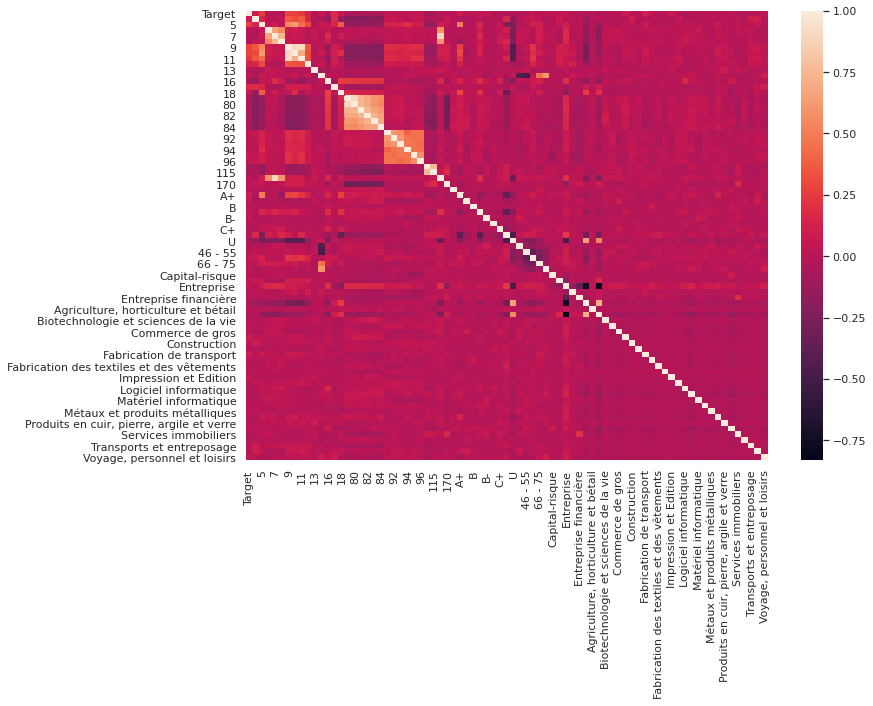

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation_data)

In [ ]:
#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data.columns
index = 0;

for x in correlation_data['Target'].tolist():
    if(x >= -0.1 and x <=0.1):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['Target', 5, 9, 10, 11, 12, 17, 'Fabrication de transport']

In [ ]:
df_org = df_org[cols_to_be_selected]
df_org

,Target,5,9,10,11,12,17,Fabrication de transport
0,0,16,14,12,4,1.0,6,0
1,0,17,10,8,7,0.0,10,0
2,0,10,18,9,9,0.0,10,0
3,0,1,14,8,9,1.0,17,0
4,0,6,8,8,0,0.0,39,0
...,...,...,...,...,...,...,...,...
1402,0,60,49,31,27,0.0,49,0
1403,0,2,11,9,4,0.0,5,0
1404,0,32,36,22,22,0.0,7,0
1405,1,5,40,28,24,0.0,2,0


## Handling imbalanced dataset using up-sampling / over-sampling

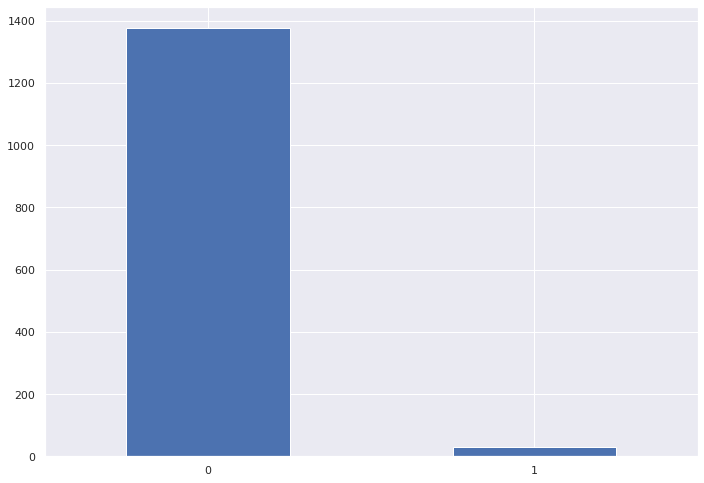

In [ ]:
# There is huge difference between ratio of target class values . So we need to apply some techniques to handle this  imbalanced data.
(df_org['Target'].value_counts()).plot(kind='bar',rot=0)

In [ ]:
# Implementing oversampling / upsampling for handling imbalanced dataset

from imblearn.combine import SMOTETomek
from collections import Counter

X = df_org[[5,9,10,11,12,17,'Fabrication de transport']]
Y = df_org[['Target']]

smk = SMOTETomek(random_state=42)
X_res, Y_res = smk.fit_sample(X,Y)


print('Original dataset shape {}'.format(Counter(Y['Target'])))
print('Resampled dataset shape {}'.format(Counter(Y_res)),'\n\n\n')


Original dataset shape Counter({0: 1376, 1: 31})
Resampled dataset shape Counter({0: 1371, 1: 1371}) 





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Training & Testing using machine learning models

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#converting dataframe into numpy arrays
target = np.array(Y_res)
features = np.array(X_res)

train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)



Training Features Shape: (2056, 7)
Training Labels Shape: (2056,)
Testing Features Shape: (686, 7)
Testing Labels Shape: (686,)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(train_features,train_labels)
pred_lgr = lgr.predict(test_features)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Multinominal Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_features,train_labels)
pred_mnb = mnb.predict(test_features)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(train_features, train_labels)
pred_rfc = rfc.predict(test_features)

## Decision Tree

In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_features, train_labels)
pred_dtc = dtc.predict(test_features)

## K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
pred_knn = knn.predict(test_features)

## Evalutation of models using confusion matrix 

When it comes to models evalutaion, we want to see everything . Confusion matrix is the most professional approach in order to determine how your model behaves on training and testing data. 

Confusion matrix contains 4 elements.



*   Simple accuracy
*   Precision Score
*   Recall Score
*   f1-Score

Simple Accuracy contains a comparison between predicted target classes.

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0


F1-score is a measure of a model's accuracy on a dataset. The F1-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.







In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [ ]:
# Evaluation of Logistic Regression
predictions = pred_lgr

acc_lgr = accuracy_score(test_labels, predictions)
pre_lgr = precision_score(test_labels, predictions)
rec_lgr = recall_score(test_labels, predictions)
f1_lgr = f1_score(test_labels, predictions,zero_division=1)

print('Accuracy score for Logistic Regression: ', acc_lgr)
print('Precision score for Logistic Regression: ', pre_lgr)
print('Recall score for Logistic Regression: ', rec_lgr)
print('F1 score for Logistic Regression: ', f1_lgr,"\n\n\n")



Accuracy score for Logistic Regression:  0.8673469387755102
Precision score for Logistic Regression:  0.8708708708708709
Recall score for Logistic Regression:  0.8579881656804734
F1 score for Logistic Regression:  0.864381520119225 





In [ ]:
# Evaluation of Random Forest
predictions = pred_rfc

acc_rfc = accuracy_score(test_labels, predictions)
pre_rfc = precision_score(test_labels, predictions)
rec_rfc = recall_score(test_labels, predictions)
f1_rfc = f1_score(test_labels, predictions,zero_division=1)

print('Accuracy score for Random Forest: ', acc_rfc)
print('Precision score for Random Forest: ', pre_rfc)
print('Recall score for Random Forest: ', rec_rfc)
print('F1 score for Random Forest: ', f1_rfc,"\n\n\n")


Accuracy score for Random Forest:  0.978134110787172
Precision score for Random Forest:  0.9708454810495627
Recall score for Random Forest:  0.985207100591716
F1 score for Random Forest:  0.9779735682819383 





In [ ]:
# Evaluation of Multinominal Naive Bayes
predictions = pred_mnb

acc_mnb = accuracy_score(test_labels, predictions)
pre_mnb = precision_score(test_labels, predictions)
rec_mnb = recall_score(test_labels, predictions)
f1_mnb = f1_score(test_labels, predictions,zero_division=1)

print('Accuracy score for Multinominal Naive Bayes: ', acc_mnb)
print('Precision score for Multinominal Naive Bayes: ', pre_mnb)
print('Recall score for Multinominal Naive Bayes: ', rec_mnb)
print('F1 score for Multinominal Naive Bayes: ', f1_mnb,"\n\n\n")


Accuracy score for Multinominal Naive Bayes:  0.5422740524781341
Precision score for Multinominal Naive Bayes:  0.5697674418604651
Recall score for Multinominal Naive Bayes:  0.28994082840236685
F1 score for Multinominal Naive Bayes:  0.38431372549019605 





In [ ]:
# Evaluation of Decision Tree
predictions = pred_dtc

acc_dtc = accuracy_score(test_labels, predictions)
pre_dtc = precision_score(test_labels, predictions)
rec_dtc = recall_score(test_labels, predictions)
f1_dtc = f1_score(test_labels, predictions,zero_division=1)

print('Accuracy score for Decision Tree: ', acc_dtc)
print('Precision score for Decision Tree: ', pre_dtc)
print('Recall score for Decision Tree: ', rec_dtc)
print('F1 score for Decision Tree: ', f1_dtc,"\n\n\n")

Accuracy score for Decision Tree:  0.956268221574344
Precision score for Decision Tree:  0.9529411764705882
Recall score for Decision Tree:  0.9585798816568047
F1 score for Decision Tree:  0.9557522123893805 





In [ ]:
# Evaluation of K Nearest Neighbour
predictions = pred_knn

acc_knn = accuracy_score(test_labels, predictions)
pre_knn = precision_score(test_labels, predictions)
rec_knn = recall_score(test_labels, predictions)
f1_knn = f1_score(test_labels, predictions,zero_division=1)

print('Accuracy score for Logistic Regression: ', acc_lgr)
print('Precision score for Logistic Regression: ', pre_lgr)
print('Recall score for Logistic Regression: ', rec_lgr)
print('F1 score for Logistic Regression: ', f1_lgr,"\n\n\n")


Accuracy score for Logistic Regression:  0.8673469387755102
Precision score for Logistic Regression:  0.8708708708708709
Recall score for Logistic Regression:  0.8579881656804734
F1 score for Logistic Regression:  0.864381520119225 





## Models Accuracy-Score Comparison

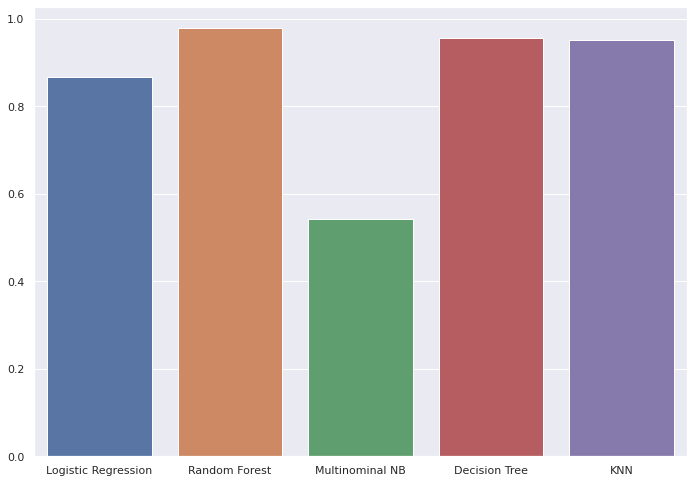

In [ ]:
sns.barplot(x=['Logistic Regression','Random Forest','Multinominal NB','Decision Tree','KNN'],y=[acc_lgr,acc_rfc,acc_mnb,acc_dtc,acc_knn])

## Models Precision-Score Comparison


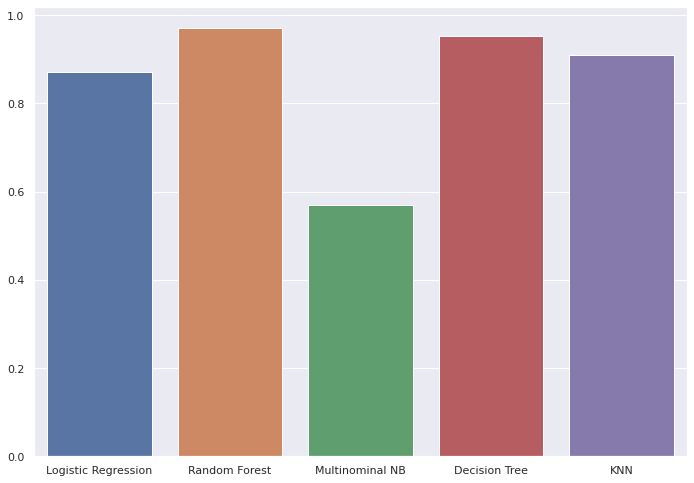

In [ ]:
sns.barplot(x=['Logistic Regression','Random Forest','Multinominal NB','Decision Tree','KNN'],y=[pre_lgr,pre_rfc,pre_mnb,pre_dtc,pre_knn])

## Models Recall-Score Comparison

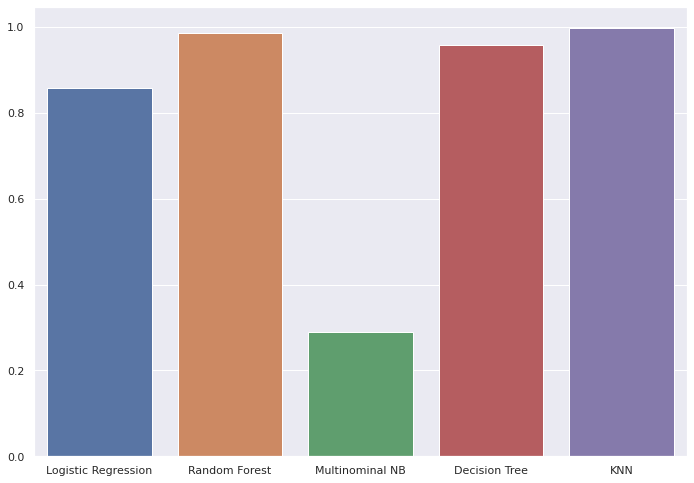

In [ ]:
sns.barplot(x=['Logistic Regression','Random Forest','Multinominal NB','Decision Tree','KNN'],y=[rec_lgr,rec_rfc,rec_mnb,rec_dtc,rec_knn])

## Models F1-Score Comparison

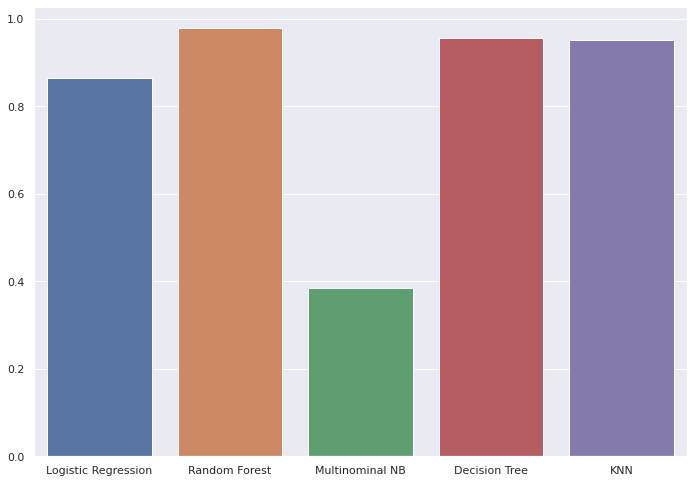

In [ ]:
sns.barplot(x=['Logistic Regression','Random Forest','Multinominal NB','Decision Tree','KNN'],y=[f1_lgr,f1_rfc,f1_mnb,f1_dtc,f1_knn])